## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

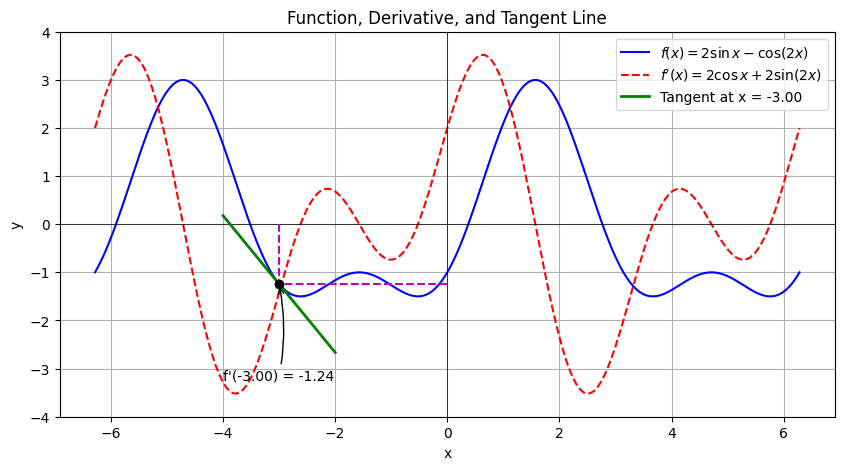

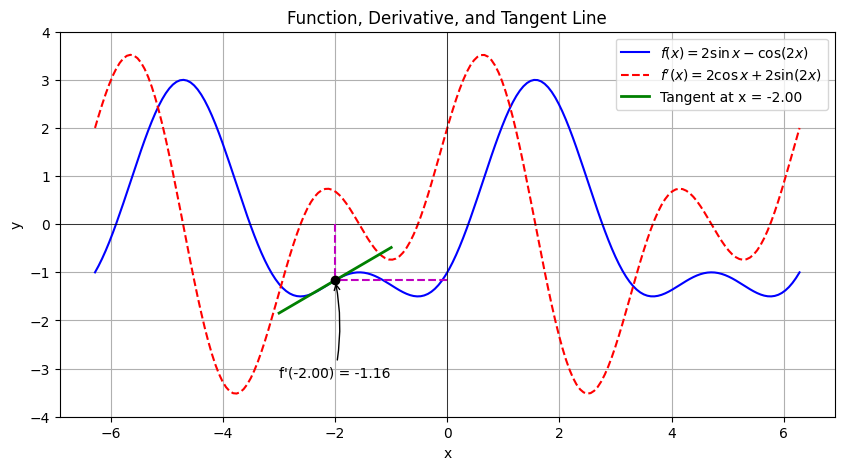

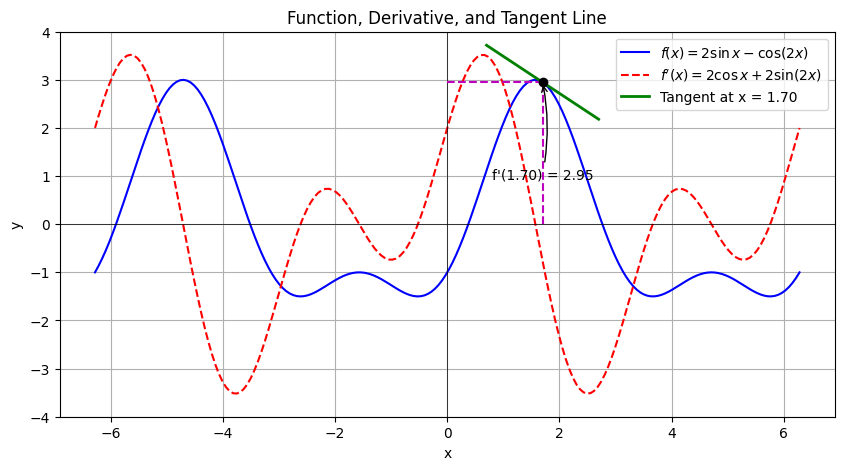

In [292]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(a):
    def f(x):
        return 2*np.sin(x) - np.cos(2*x)

    def fder(x):
        return 2*np.cos(x) + 2*np.sin(2*x)

    x_vals = np.linspace(-2*np.pi, 2*np.pi, 200) #range from example

    y_vals = f(x_vals)
    yprime_vals = fder(x_vals)

    y_a = f(a)
    slope_a = fder(a)

    x_tan = np.linspace(a - 1.0, a + 1.0, 50)
    y_tan = y_a + slope_a * (x_tan - a)

    
    plt.figure(figsize=(10, 5))
    plt.plot(x_vals, y_vals, 'b-', label=r"$f(x) = 2\sin x - \cos(2x)$")
    plt.plot(x_vals, yprime_vals, 'r--', label=r"$f'(x) = 2\cos x + 2\sin(2x)$")
    
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)

    plt.ylim((-4,4))

    plt.plot(x_tan, y_tan, 'g-', linewidth=2,
             label=f"Tangent at x = {a:.2f}")
    
    plt.plot([a, a], [0, y_a], 'm--', linewidth=1.5) 
    plt.plot([0, a], [y_a, y_a], 'm--', linewidth=1.5) 

    plt.plot(a, y_a, 'ko') 
    plt.annotate(
        f"f'({a:.2f}) = {y_a:.2f}",
        xy=(a, y_a),
        ha='center',
        xytext=(a, y_a-2),
        arrowprops=dict(arrowstyle="->", color='black', connectionstyle="arc3,rad=.1") #couldn't mimic arrow style from example 1:1
    )

    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="upper right")
    plt.grid(True)

    plt.show()

beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

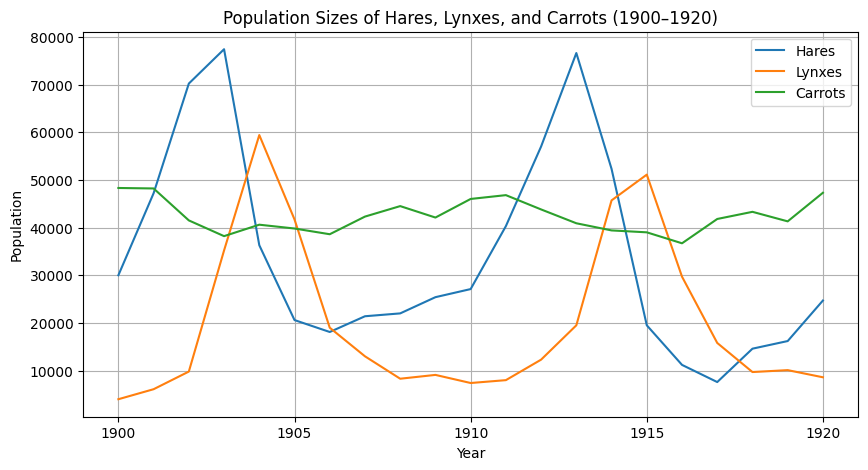

In [293]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("datasets/populations.txt", sep='\\s+', comment='#',
                   names=['year', 'hare', 'lynx', 'carrot'])

plt.figure(figsize=(10,5))
plt.plot(data['year'], data['hare'], label='Hares')
plt.plot(data['year'], data['lynx'], label='Lynxes')
plt.plot(data['year'], data['carrot'], label='Carrots')

plt.xticks(range(1900, 1921, 5))

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Sizes of Hares, Lynxes, and Carrots (1900–1920)")
plt.legend()
plt.grid(True)
plt.show()


- Find which year each species had the largest population. Mark these years in the plot of populations.

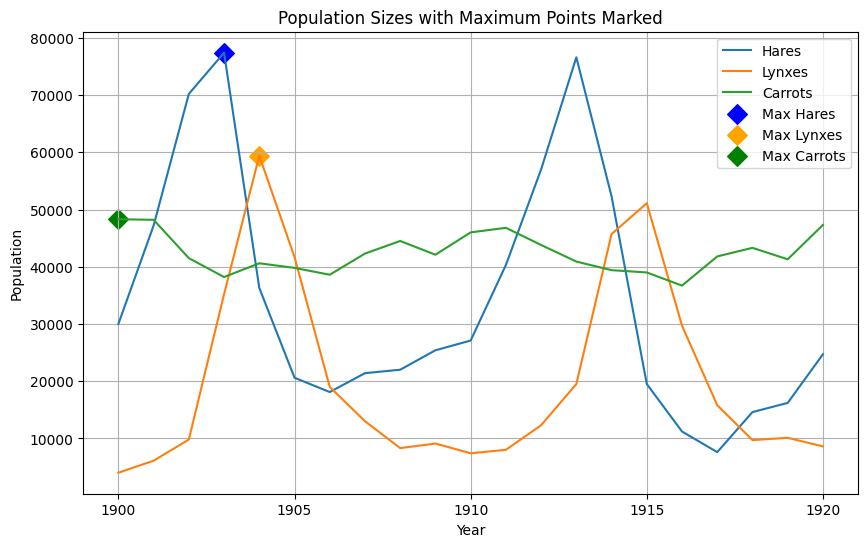

Max Hares in year: 1903.0
Max Lynxes in year: 1904.0
Max Carrots in year: 1900.0


In [294]:
max_hare_index = data['hare'].idxmax()
max_lynx_index = data['lynx'].idxmax()
max_carrot_index = data['carrot'].idxmax()

max_hare_year, max_hare_pop = data.loc[max_hare_index, ['year', 'hare']]
max_lynx_year, max_lynx_pop = data.loc[max_lynx_index, ['year', 'lynx']]
max_carrot_year, max_carrot_pop = data.loc[max_carrot_index, ['year', 'carrot']]

plt.figure(figsize=(10,6))
plt.plot(data['year'], data['hare'], label='Hares')
plt.plot(data['year'], data['lynx'], label='Lynxes')
plt.plot(data['year'], data['carrot'], label='Carrots')

plt.scatter([max_hare_year], [max_hare_pop], color='blue', s=100, marker='D', label='Max Hares')
plt.scatter([max_lynx_year], [max_lynx_pop], color='orange', s=100, marker='D', label='Max Lynxes')
plt.scatter([max_carrot_year], [max_carrot_pop], color='green', s=100, marker='D', label='Max Carrots')

plt.xticks(range(1900, 1921, 5)) #fix for floating point years on the X axis

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Sizes with Maximum Points Marked")
plt.legend()
plt.grid(True)
plt.show()

print("Max Hares in year:", max_hare_year)
print("Max Lynxes in year:", max_lynx_year)
print("Max Carrots in year:", max_carrot_year)

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

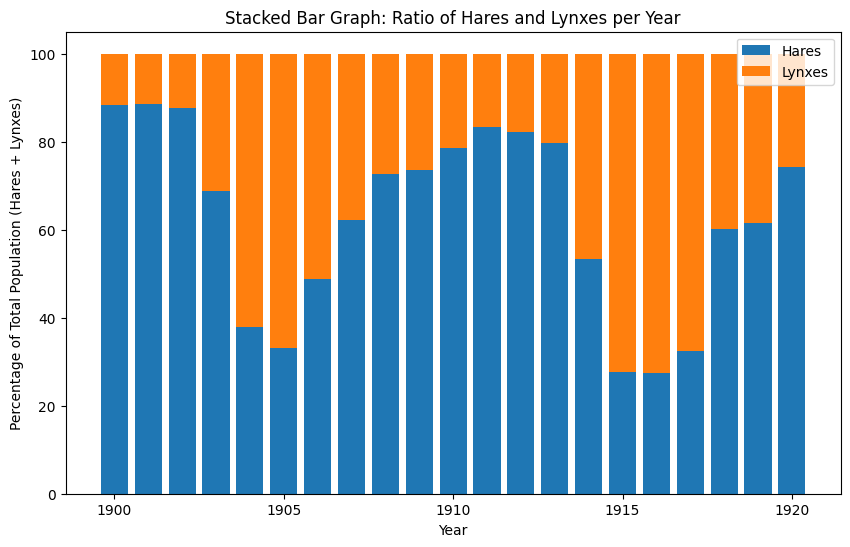

In [295]:
total = data['hare'] + data['lynx']
hare_ratio = data['hare'] / total * 100
lynx_ratio = data['lynx'] / total * 100

plt.figure(figsize=(10,6))
plt.bar(data['year'], hare_ratio, label='Hares')
plt.bar(data['year'], lynx_ratio, bottom=hare_ratio, label='Lynxes')

plt.xlabel("Year")
plt.ylabel("Percentage of Total Population (Hares + Lynxes)")
plt.title("Stacked Bar Graph: Ratio of Hares and Lynxes per Year")
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

Hares: mean = 34080.95, std = 21413.98
Lynxes: mean = 20166.67, std = 16656.00
Carrots: mean = 42400.00, std = 3404.56


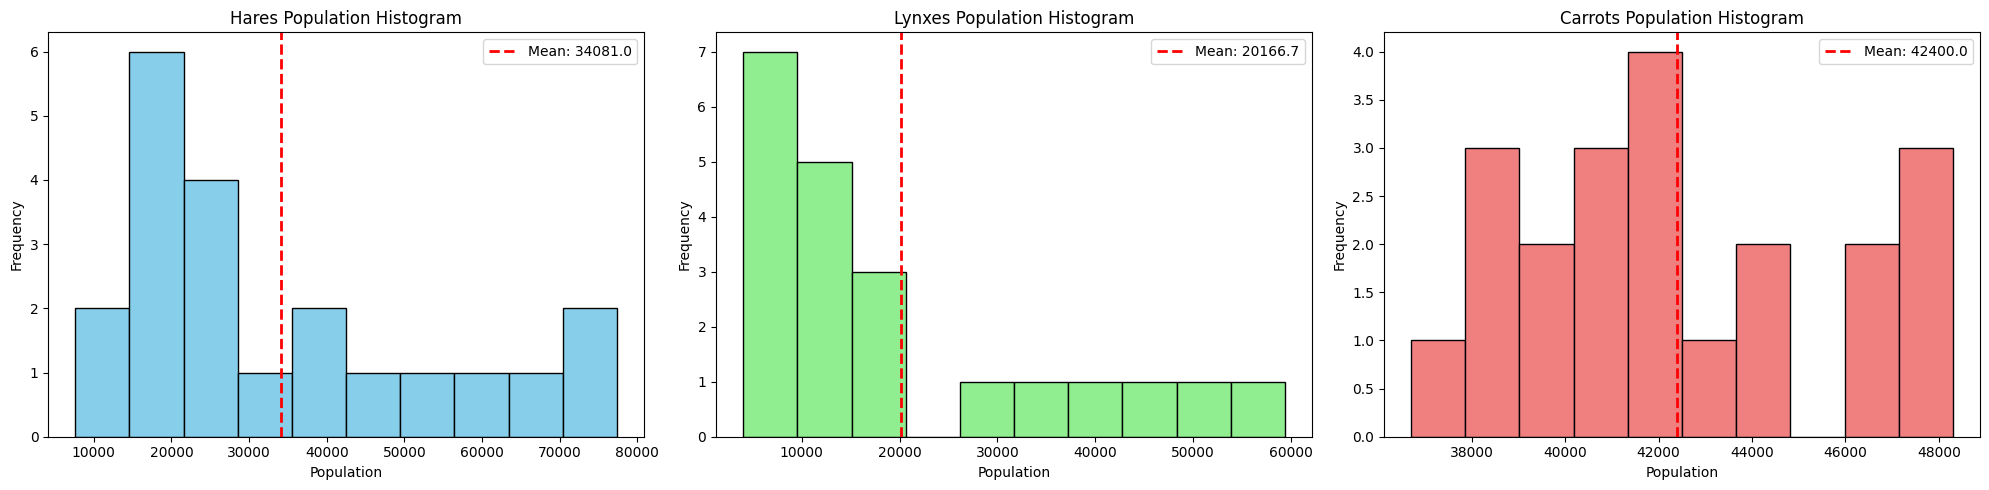

In [296]:
mean_hare, std_hare = data['hare'].mean(), data['hare'].std()
mean_lynx, std_lynx = data['lynx'].mean(), data['lynx'].std()
mean_carrot, std_carrot = data['carrot'].mean(), data['carrot'].std()

print(f"Hares: mean = {mean_hare:.2f}, std = {std_hare:.2f}")
print(f"Lynxes: mean = {mean_lynx:.2f}, std = {std_lynx:.2f}")
print(f"Carrots: mean = {mean_carrot:.2f}, std = {std_carrot:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].hist(data['hare'], bins=10, color='skyblue', edgecolor='black')
axes[0].axvline(mean_hare, color='red', linestyle='dashed', linewidth=2,
                label=f'Mean: {mean_hare:.1f}')
axes[0].set_title("Hares Population Histogram")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].hist(data['lynx'], bins=10, color='lightgreen', edgecolor='black')
axes[1].axvline(mean_lynx, color='red', linestyle='dashed', linewidth=2,
                label=f'Mean: {mean_lynx:.1f}')
axes[1].set_title("Lynxes Population Histogram")
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Frequency")
axes[1].legend()

axes[2].hist(data['carrot'], bins=10, color='lightcoral', edgecolor='black')
axes[2].axvline(mean_carrot, color='red', linestyle='dashed', linewidth=2,
                label=f'Mean: {mean_carrot:.1f}')
axes[2].set_title("Carrots Population Histogram")
axes[2].set_xlabel("Population")
axes[2].set_ylabel("Frequency")
axes[2].legend()

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Dominant species each year (H for hares, L for lynxes):
['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


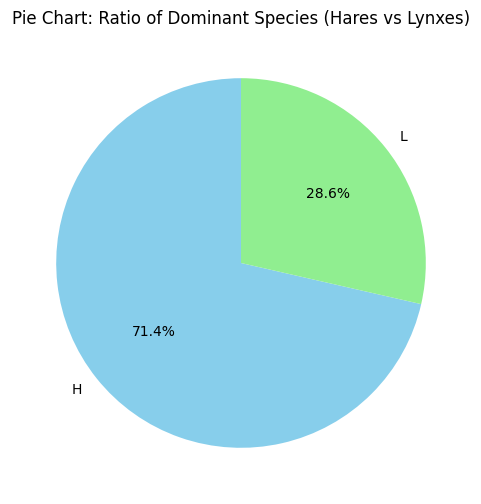

In [297]:
dominant = np.where(data['hare'] >= data['lynx'], 'H', 'L')
dominant_list = dominant.tolist()
print("Dominant species each year (H for hares, L for lynxes):")
print(dominant_list)

unique, counts = np.unique(dominant, return_counts=True)
counts_dict = dict(zip(unique, counts))

labels = list(counts_dict.keys())
sizes = list(counts_dict.values())

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'lightgreen'])
plt.title("Pie Chart: Ratio of Dominant Species (Hares vs Lynxes)")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

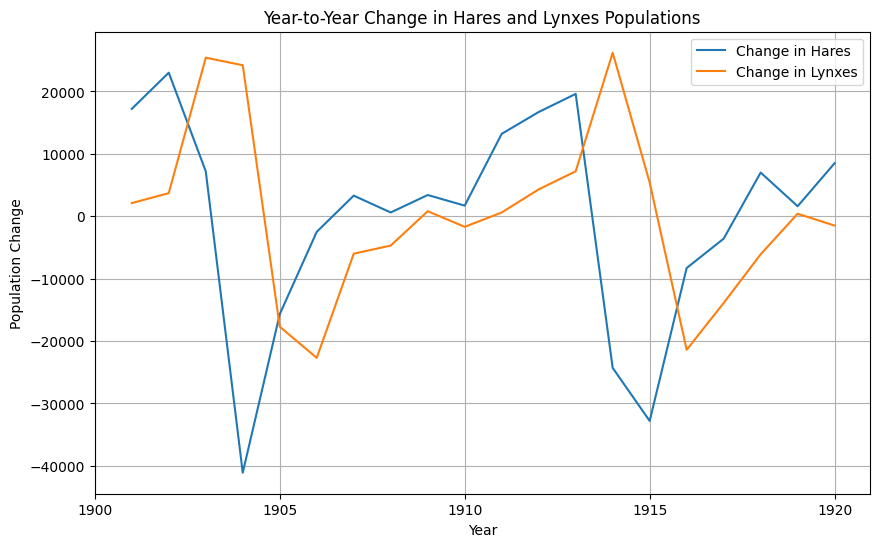

Correlation coefficient between hare and lynx changes: -0.178


In [298]:
hare_change = np.diff(data['hare'])
lynx_change = np.diff(data['lynx'])
years_change = data['year'].values[1:]  

plt.figure(figsize=(10,6))
plt.plot(years_change, hare_change, label='Change in Hares')
plt.plot(years_change, lynx_change, label='Change in Lynxes')

plt.xticks(range(1900, 1921, 5))

plt.xlabel("Year")
plt.ylabel("Population Change")
plt.title("Year-to-Year Change in Hares and Lynxes Populations")
plt.legend()
plt.grid(True)
plt.show()

corr_coef = np.corrcoef(hare_change, lynx_change)[0, 1]
print(f"Correlation coefficient between hare and lynx changes: {corr_coef:.3f}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

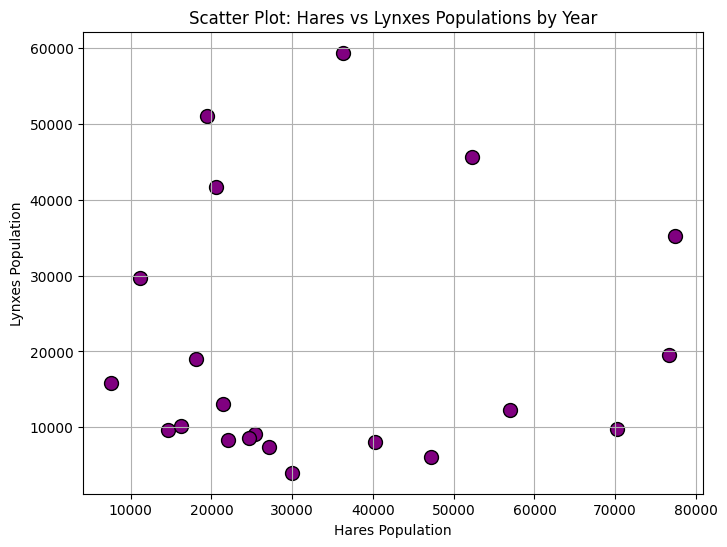

In [299]:
plt.figure(figsize=(8,6))
plt.scatter(data['hare'], data['lynx'], c='purple', edgecolors='k', s=100)

plt.xlabel("Hares Population")
plt.ylabel("Lynxes Population")
plt.title("Scatter Plot: Hares vs Lynxes Populations by Year")
plt.grid(True)
plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

Firstly, we can try to use the 'naive' prediction using mean of hare population before 1920

In [300]:
train_data = data[data['year'] < 1920]
mean_hare = train_data['hare'].mean()
true_hare_1920 = data.loc[data['year'] == 1920, 'hare'].values[0]
error_ratio = abs(mean_hare - true_hare_1920) / true_hare_1920

print("Naive Mean Prediction:")
print(f"Predicted hare population (1920): {mean_hare:.2f}")
print(f"True hare population (1920):      {true_hare_1920:.2f}")
print(f"Error ratio: {error_ratio:.3f}")

Naive Mean Prediction:
Predicted hare population (1920): 34550.00
True hare population (1920):      24700.00
Error ratio: 0.399


As we can observe the error is quite huge, so how can we improve it?

We can try to use simple polynomial fit, that comes built-in with numpy. We will try to fit some polynomial to the known numbers of hare population

In [301]:
years_train = train_data['year'].values
hares_train = train_data['hare'].values
# taken from https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
coeffs_linear = np.polyfit(years_train, hares_train, 1)
poly_linear = np.poly1d(coeffs_linear)

estimated_linear = poly_linear(1920)
true_hare_1920 = data.loc[data['year'] == 1920, 'hare'].values[0]

error_ratio_linear = abs(estimated_linear - true_hare_1920) / true_hare_1920
print("Polynomial fit:")
print(f"Estimated hare population in 1920: {estimated_linear:.2f}")
print(f"True hare population in 1920: {true_hare_1920:.2f}")
print(f"Error ratio: {error_ratio_linear:.3f}\n")

Polynomial fit:
Estimated hare population in 1920: 19775.79
True hare population in 1920: 24700.00
Error ratio: 0.199



We can observe that the error is quite big. We can approach this problem using some heuristic observations. We can observe that hare population seems to be lagged behind lynx population by about 1-2 ticks (just graphically speaking).If we suppose that we know lynx population for the yar 1920, that means we can estimate the number of hares for the year 1920. We can check the correlation between the shifted variants of given time-series

In [302]:
lag = 1
X_train = train_data['lynx'].values[lag:]
y_train = train_data['hare'].values[:-lag]   

corr_coef = np.corrcoef(X_train, y_train)[0, 1]
print(f"Correlation coefficient between X_train and y_train (lag={lag}): {corr_coef:.3f}")


Correlation coefficient between X_train and y_train (lag=1): 0.719


Okay, so the correlation seems quite good. (Actually if we check for the lag=2 the correlation is 0.925, but lag=2 won't be able to yield us any estimation results, as we would need to know lynx population for the year 1921). So let's try to utilise method of least squares to estimate hare population for the year 1920

C:\Users\matveypc\AppData\Local\Temp\ipykernel_20568\3968394516.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, y_train)[0]


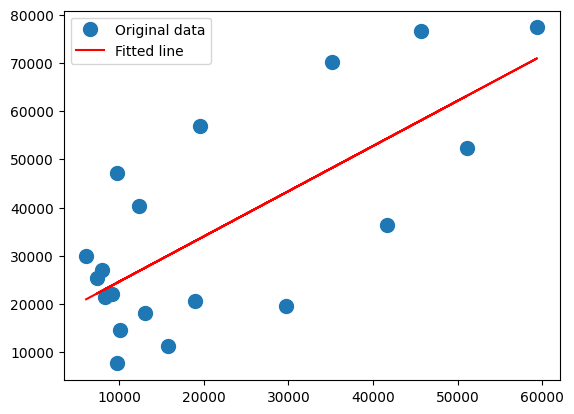

Linear Regression using lagged lynx time series:
Estimated hare population in 1920: 23283.04
True hare population in 1920: 24700.00
Error ratio: 0.057



In [303]:
A = np.vstack([X_train, np.ones(len(X_train))]).T # taken from https://numpy.org/doc/2.1/reference/generated/numpy.linalg.lstsq.html
m, c = np.linalg.lstsq(A, y_train)[0]

plt.plot(X_train, y_train, 'o', label='Original data', markersize=10)
plt.plot(X_train, m*X_train + c, 'r', label='Fitted line')
plt.legend()
plt.show()

estimated_linear = data['lynx'].values[-1] * m + c
true_hare_1920 = data['hare'].values[-1]
error_ratio_linear = abs(estimated_linear - true_hare_1920) / true_hare_1920

print("Linear Regression using lagged lynx time series:")
print(f"Estimated hare population in 1920: {estimated_linear:.2f}")
print(f"True hare population in 1920: {true_hare_1920:.2f}")
print(f"Error ratio: {error_ratio_linear:.3f}\n")

As we can see we significantly reduced the error. But the vailidity of this solution depends of if we actually know the population of lynxes for the year 1920